# 6/3/2024 - titanic EDA
<b> titanic eda - cont'd </b>

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [6]:
# Visualization
import matplotlib.pyplot as plt

# Modeling and Prediction
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [17]:
train_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/train.csv')
test_data = pd.read_csv('/Users/annikaseo-yeonkim/Desktop/MongooseAI/1주차/titanic/datasets/test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_data.tail(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
def highlight(value):
    # The painting of the cell in different colors depending on the value: 
    # >= 0.5 - palegreen, < 0.5 - pink
    
    if value >= 0.5:
        style = 'background-color: palegreen'
    else:
        style = 'background-color: pink'
    return style

In [9]:
pd.pivot_table(train_data, values='Survived', index=['Sex']).style.applymap(highlight)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
train_data['Family_size'] = (train_data['SibSp'] + train_data['Parch']) // 2  # it is wrong!
# Pivot table for input features 'Sex' and 'Family_size' and output feature 'Survived'
pd.pivot_table(train_data, values='Survived', index=['Sex', 'Family_size']).style.applymap(highlight)

In [12]:
train_data['Age_7'] = train_data['Age']     # it is wrong!
train_data['Age_7'] = train_data['Age_7'].fillna(30 // 7).astype('int')

In [13]:
train_data['Sex'].replace({'male': 0, 'female': 1}).head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [14]:
def df_transform(df):
    # FE for df
    
    # Number of family members - feature "Family_size"
    df['Family_size'] = (df['SibSp'] + df['Parch']) // 2  # it is wrong!
    
    # Age multiple of 7
    df['Age_7'] = df['Age']    # it is wrong!
    
    # Average age of all dataset multiple of 7
    mean_age = 30 // 7   # it is wrong!
    
    # Replace missing age values to average age and rounding them to integers
    df['Age_7'] = df['Age_7'].fillna(mean_age).astype('int')
    
    # Encoding feature "Sex" by numbers
    df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
    
    # Select the main features
    df = df[['Family_size','Age_7','Sex']]
    
    return df

In [18]:
target = train_data.pop('Survived')
# FE to training dataset
train = df_transform(train_data)

# Statistics of training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Family_size  891 non-null    int64
 1   Age_7        891 non-null    int64
 2   Sex          891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


In [19]:
test = df_transform(test_data)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Family_size  418 non-null    int64
 1   Age_7        418 non-null    int64
 2   Sex          418 non-null    int64
dtypes: int64(3)
memory usage: 9.9 KB


In [20]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(train, target)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [38]:
print(train.columns)
feature_list = ['Family_size','Age_7','Sex']

Index(['Family_size', 'Age_7', 'Sex'], dtype='object')


[Text(0.44, 0.9, 'Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = No Survived'),
 Text(0.2, 0.7, 'Age_7 <= 3.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = No Survived'),
 Text(0.08, 0.5, 'Family_size <= 1.5\ngini = 0.401\nsamples = 18\nvalue = [5, 13]\nclass = Survived'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Survived'),
 Text(0.12, 0.3, 'Age_7 <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No Survived'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No Survived'),
 Text(0.16, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.32, 0.5, 'Family_size <= 1.5\ngini = 0.284\nsamples = 559\nvalue = [463, 96]\nclass = No Survived'),
 Text(0.28, 0.3, 'Family_size <= 0.5\ngini = 0.294\nsamples = 536\nvalue = [440, 96]\nclass = No Survived'),
 Text(0.24, 0.1, 'gini = 0.279\nsamples = 484\nvalue = [403, 81]\nclass = No Survived'),
 Text(0.32, 0.1, 'gini = 0.411\nsamples = 52\

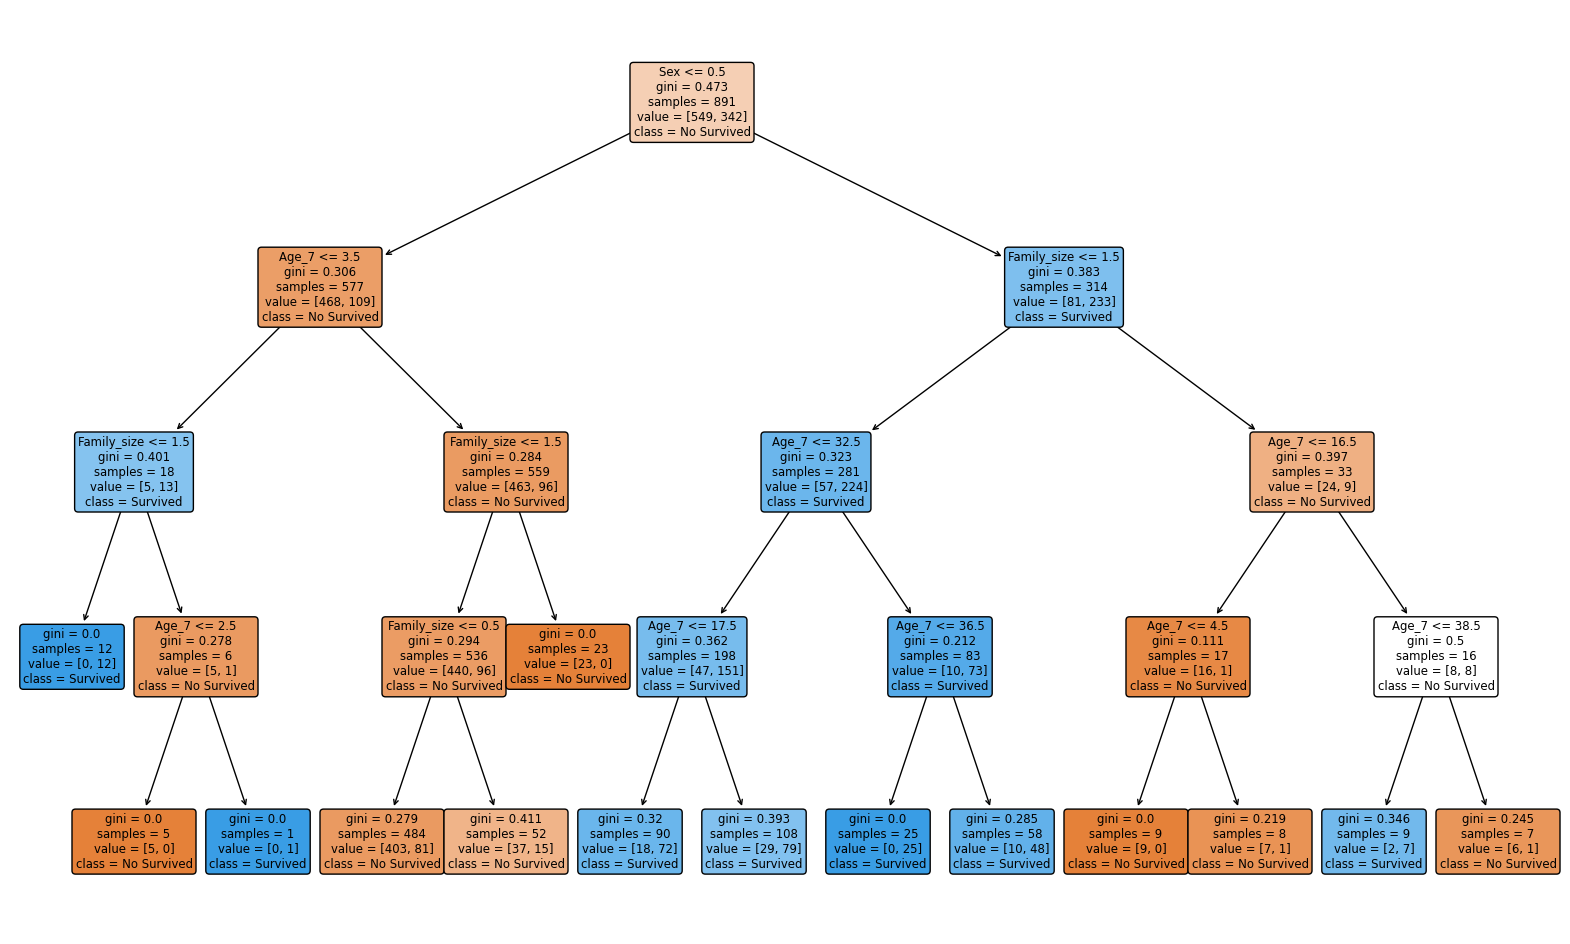

In [39]:
plt.figure(figsize=(20,12))
plot_tree(model, filled=True, rounded=True, class_names=["No Survived", "Survived"], feature_names=feature_list) 

In [31]:
y_train = model.predict(train).astype(int)
confusion_matrix(target, y_train) 

array([[490,  59],
       [ 98, 244]])

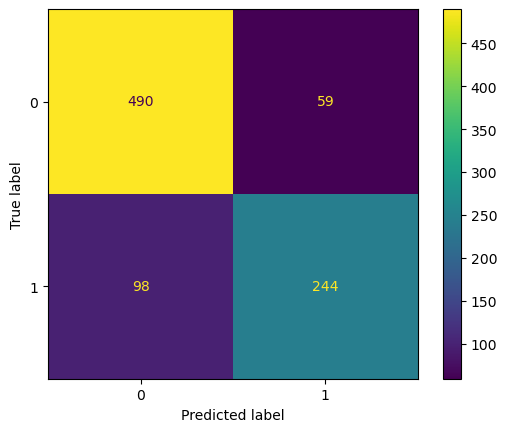

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm = confusion_matrix(target, y_train)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [43]:
print('Recall: ', recall_score(target, y_train))
print('Precision: ', precision_score(target, y_train))

Recall:  0.7134502923976608
Precision:  0.8052805280528053


In [34]:
submission = pd.read_csv('/Users/annikaseo-yeonkim/Downloads/gender_submission.csv')
y_pred = model.predict(test).astype(int)
submission["Survived"] = y_pred


In [45]:
from sklearn.svm import SVC

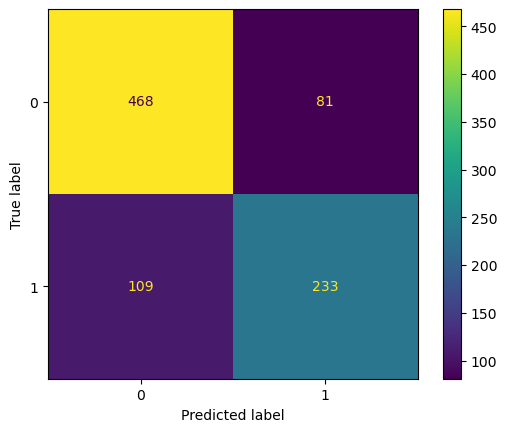

In [49]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(train,target)  
y_pred= classifier.predict(train)  
cm =confusion_matrix(target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [50]:
print('Recall: ', recall_score(target, y_pred))
print('Precision: ', precision_score(target, y_pred))

Recall:  0.6812865497076024
Precision:  0.7420382165605095


In [51]:
clf_linear = SVC(kernel='linear')
clf_linear.fit(train, target)

SVC(kernel='linear')

# RANDOM FOREST & ENSEMBLE


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

In [56]:
rf.fit(train, target)

RandomForestClassifier()

In [57]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(train, target)

RandomForestClassifier(random_state=1)

<Axes: xlabel='Importance'>

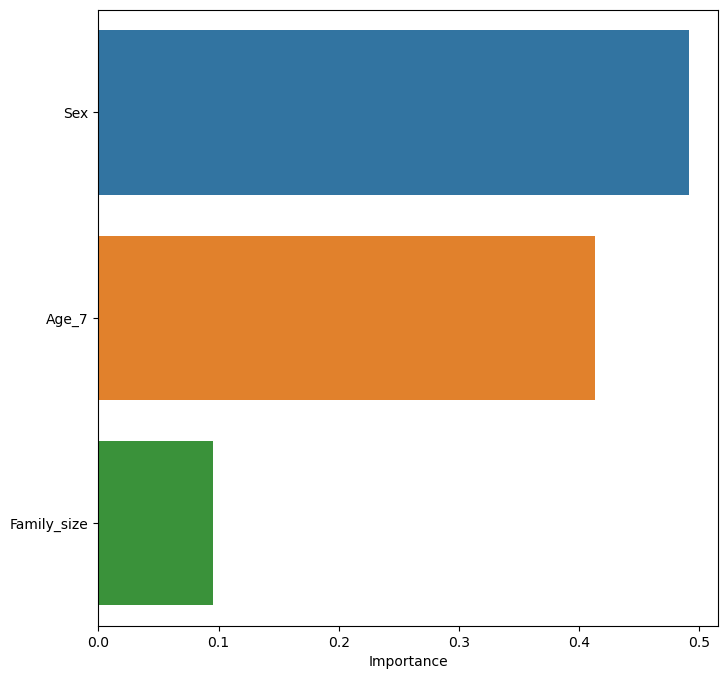

In [59]:
importances = rf_estimator.feature_importances_

columns = train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

In [60]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

accuracy score: 0.8237934904601572


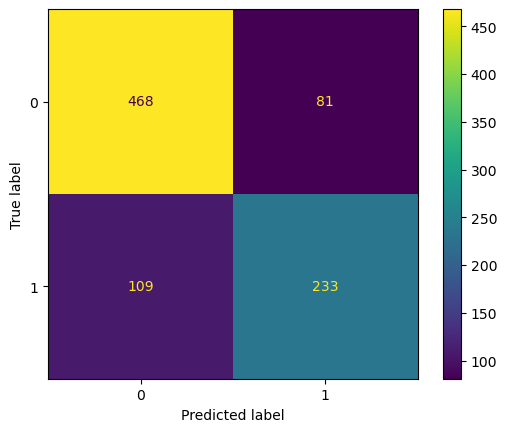

Confusion matrix
[[490  59]
 [ 98 244]]
class 0 accuracy: 0.98
class 1 accuracy: 0.02568421052631579


In [69]:
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(target, y_train)}')
cf_mat = confusion_matrix(target, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

In [72]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
# lrm.fit(target,y_train)